# Telecom Customer Churn Project
### Islam Elshakshuki
### ITSE504

## Project Overview

# 📊 Customer Churn Prediction

## 📌 Project Overview
Customer churn refers to the loss of customers over time, which is a crucial concern for businesses. The goal of this project is to analyze customer data and build machine learning models to predict whether a customer is likely to churn. 

## 🏆 Objectives
- Explore and visualize the dataset to understand patterns.
- Preprocess data by handling missing values and encoding categorical features.
- Apply Principal Component Analysis (PCA) for dimensionality reduction.
- Train and evaluate various machine learning models.
- Compare model performance using evaluation metrics and visualizations.


## Load Data & Initial Exploration

## 📂 Load Dataset & Initial Exploration
Before building our model, we start by loading the dataset and performing initial analysis to understand the structure of the data.

### 🔍 Steps:
1. Load the dataset.
2. Display general information (columns, data types, missing values).
3. Show summary statistics.
4. Identify missing values.


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    log_loss, classification_report, confusion_matrix, roc_curve
)
# Load dataset
df = pd.read_csv("Call_Details_Data.csv")

# Display first few rows
display(df.head())

# Data overview
df.info()
display(df.describe())

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101174 non-null  object 
 1   Account Length  101174 non-null  int64  
 2   VMail Message   101174 non-null  int64  
 3   Day Mins        101174 non-null  float64
 4   Day Calls       101174 non-null  int64  
 5   Day Charge      101174 non-null  float64
 6   Eve Mins        101174 non-null  float64
 7   Eve Calls       101174 non-null  int64  
 8   Eve Charge      101174 non-null  float64
 9   Night Mins      101174 non-null  float64
 10  Night Calls     101174 non-null  int64  
 11  Night Charge    101174 non-null  float64
 12  Intl Mins       101174 non-null  float64
 13  Intl Calls      101174 non-null  int64  
 14  Intl Charge     101174 non-null  float64
 15  CustServ Calls  101174 non-null  int64  
 16  Churn           101174 non-null  bool   
dtypes: bool(1)

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000
mean,323.597149,18.142645,587.080798,267.207613,64.958811,655.512526,267.166930,34.358125,646.786643,261.673187,13.900142,20.291269,5.737798,4.347635,2.559640
std,1418.073651,75.826932,2193.094319,947.963370,133.515808,2473.445436,932.914437,36.248577,2368.028491,884.963021,16.178685,25.033214,8.196367,2.761911,2.401904
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.300000,20.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,0.000000,222.300000,88.000000,23.920000,223.300000,88.000000,22.220000,223.200000,88.000000,6.220000,8.800000,2.000000,2.280000,2.000000
50%,202.000000,0.000000,262.200000,202.000000,32.600000,268.200000,202.000000,24.440000,268.200000,202.000000,9.220000,20.200000,4.000000,2.920000,2.000000
75%,240.000000,22.000000,326.275000,224.000000,82.200000,329.200000,224.000000,32.020000,329.200000,224.000000,20.440000,22.800000,8.000000,4.940000,3.000000
max,21111.000000,1111.000000,111111.110000,21111.000000,1111.990000,111111.200000,21111.000000,211.990000,111111.110000,21111.000000,211.920000,211.900000,211.000000,11.920000,11.000000


## Exploratory Data Analysis 

## 📊 Exploratory Data Analysis (EDA)
In this section, we explore the dataset through visualizations to understand the distribution of features and identify any patterns that could influence churn.

### 🔍 Key Analyses:
- Churn distribution (Pie chart)
- Histograms to understand variable distributions
- Boxplots to detect outliers
- Correlation matrix for feature relationships
- Pairplots and violin plots for feature comparisons


Phone Number      0
Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

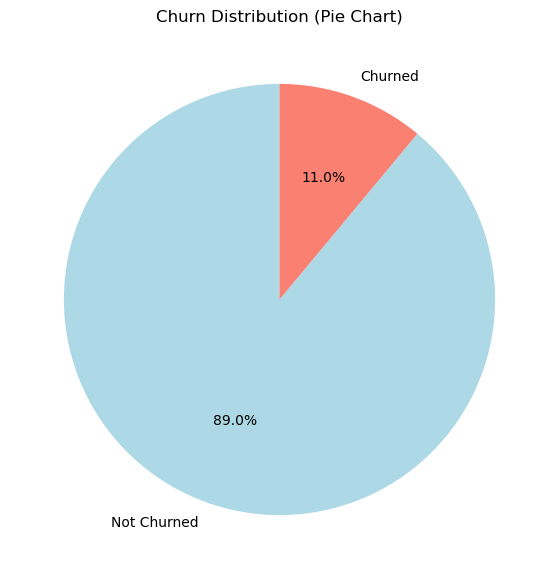

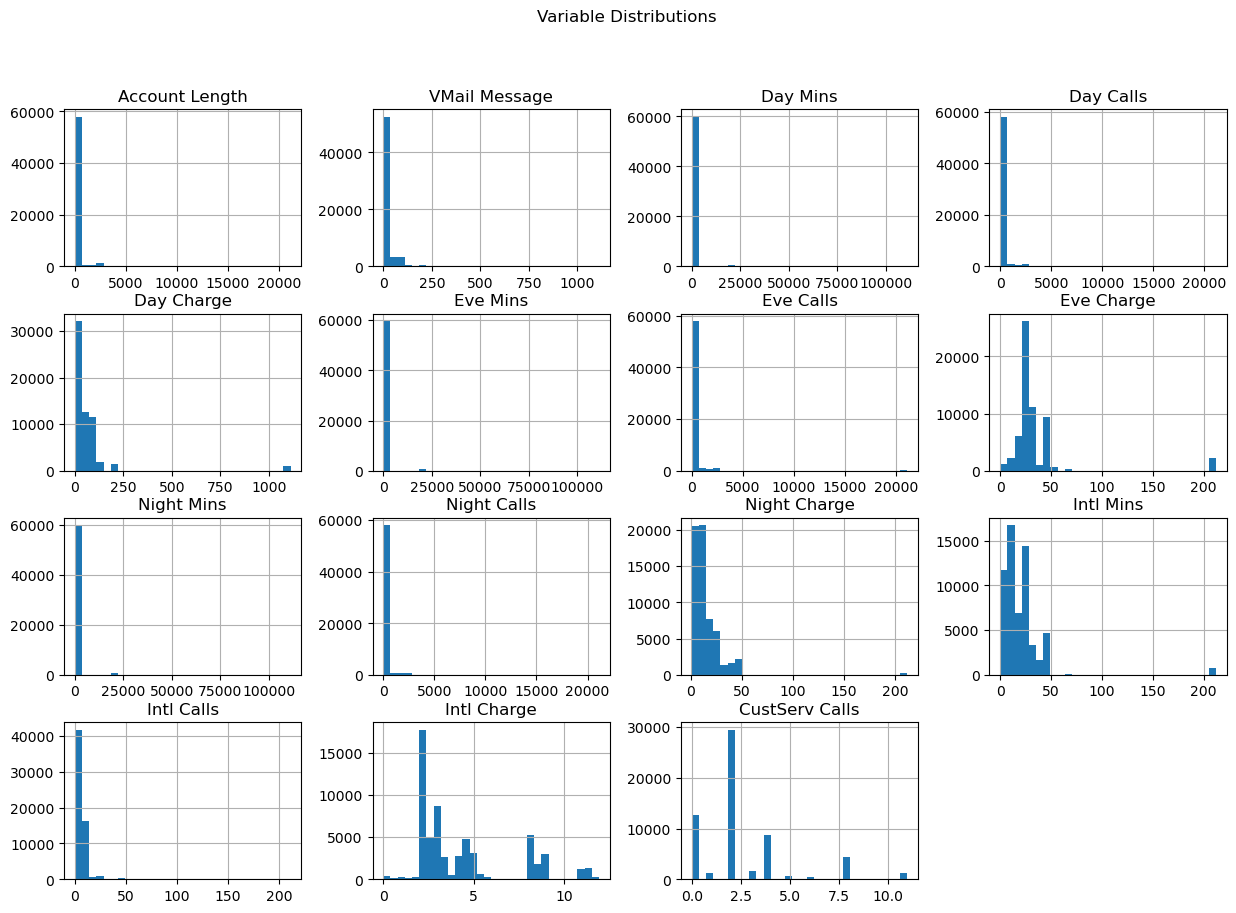

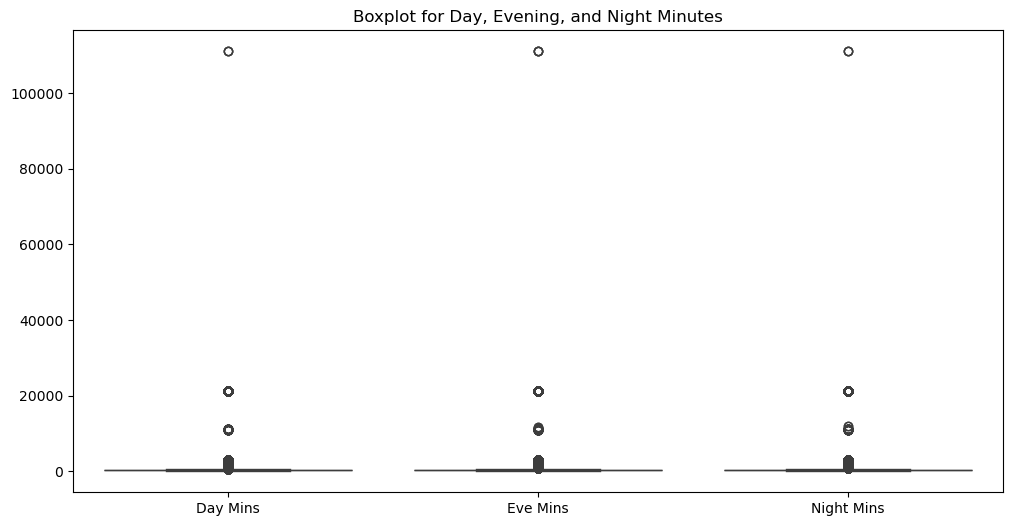

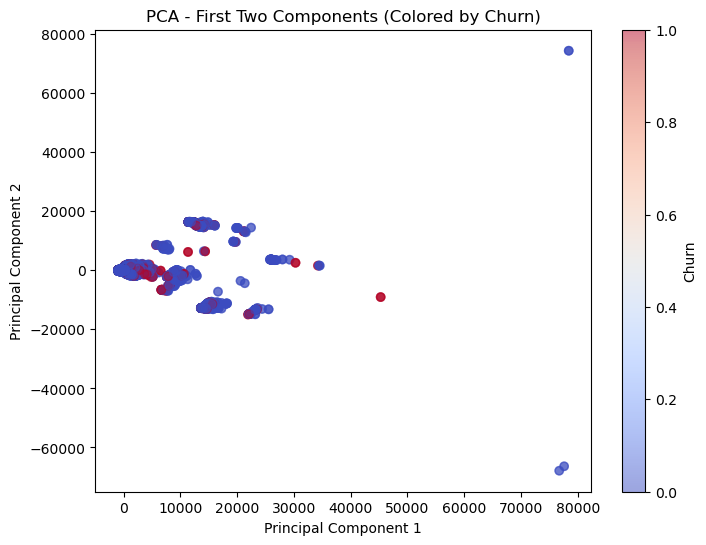

In [7]:
# check missing values
display(df.isnull().sum())

# Handling duplicates
df = df.drop_duplicates()
# Churn Distribution (Pie chart)
churn_counts = df['Churn'].value_counts()
churn_labels = ['Not Churned', 'Churned']
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=churn_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Churn Distribution (Pie Chart)")
plt.show()

# Histograms/Variable Distributions
numerical_columns = ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 
                     'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 
                     'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']

df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Variable Distributions")
plt.show()

# Boxplot for Day Mins, Eve Mins, and Night Mins to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Day Mins', 'Eve Mins', 'Night Mins']])
plt.title('Boxplot for Day, Evening, and Night Minutes')
plt.show()

# PCA for dimensionality reduction (visualization)
from sklearn.decomposition import PCA

# Dropping non-numeric columns for PCA
numerical_data = df[numerical_columns].drop(columns=['VMail Message'])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numerical_data)

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Churn'], cmap='coolwarm', alpha=0.5)
plt.title("PCA - First Two Components (Colored by Churn)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label="Churn")
plt.show()


## Data Preprocessing


## 🛠 Data Preprocessing
To prepare the data for model training, we perform the following steps:

### 🔹 Steps:
1. Handle missing values (if any).
2. Remove duplicate records.
3. Perform feature engineering by creating new relevant features.
4. Standardize numerical features to improve model performance.

Standardizing features ensures that all numerical variables have equal influence on model predictions.


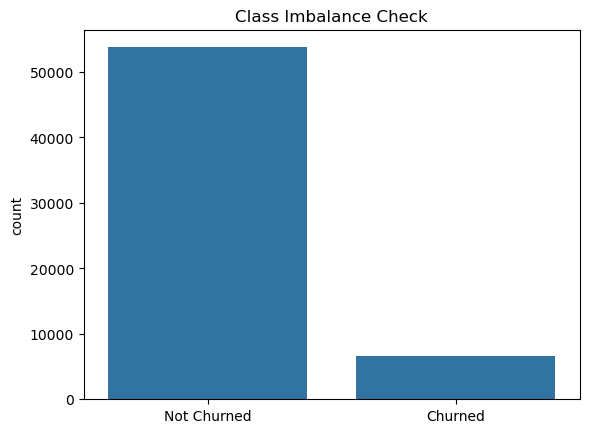

In [8]:
# Handle Missing Values (if any)
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)  # Impute with mean for numerical columns

# Feature Engineering: Adding new features
df['Total Minutes'] = df['Day Mins'] + df['Eve Mins'] + df['Night Mins'] + df['Intl Mins']
df['Total Calls'] = df['Day Calls'] + df['Eve Calls'] + df['Night Calls'] + df['Intl Calls']

# Feature Scaling (use StandardScaler as before for consistency)
scaler = StandardScaler()
scaled_features = ['Account Length', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 
                   'Day Calls', 'Eve Calls', 'Night Calls', 'Intl Calls', 'CustServ Calls']
X_scaled = scaler.fit_transform(df[scaled_features])

# Check for class imbalance
sns.barplot(x=['Not Churned', 'Churned'], y=df['Churn'].value_counts())
plt.title("Class Imbalance Check")
plt.show()


### Exploratory Data Analysis (EDA)
#### More Advanced Techniques for EDA:

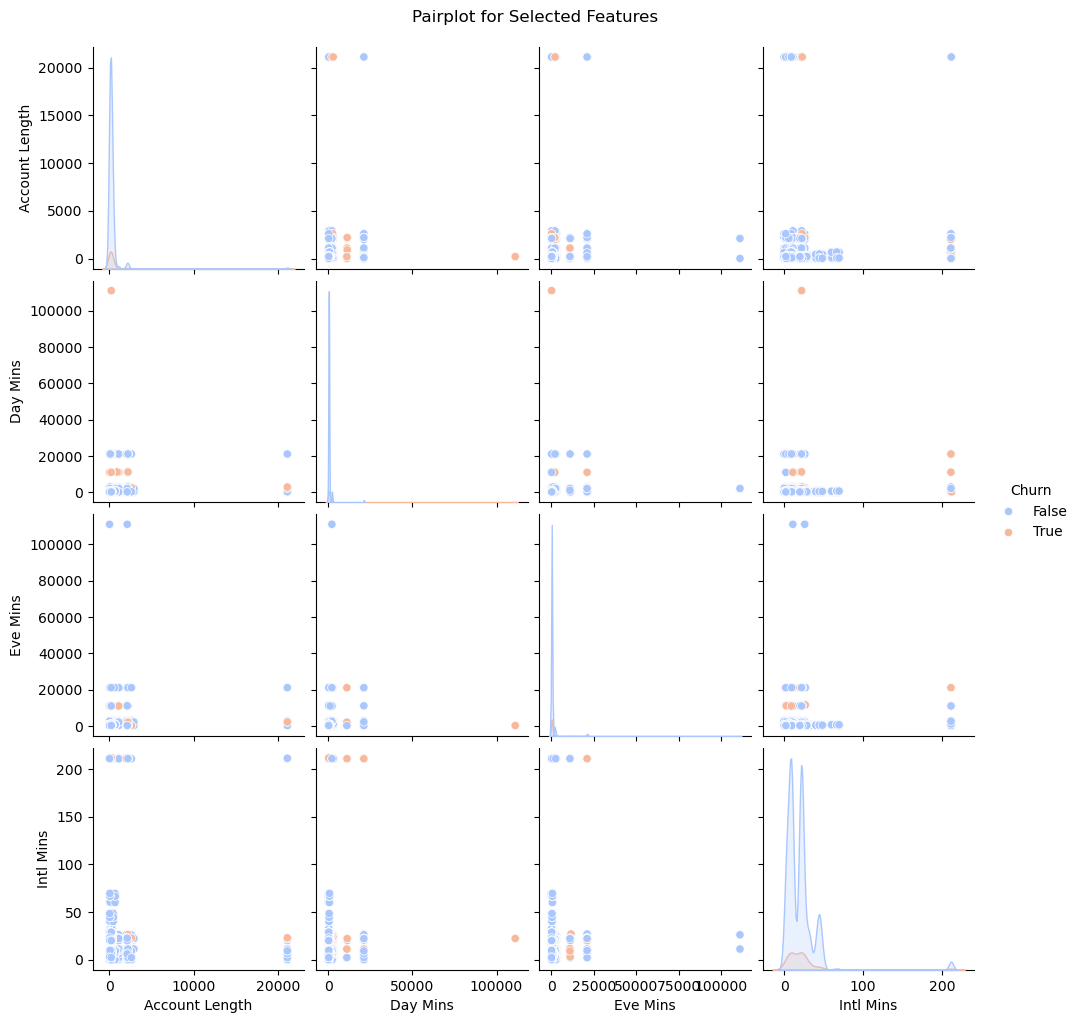

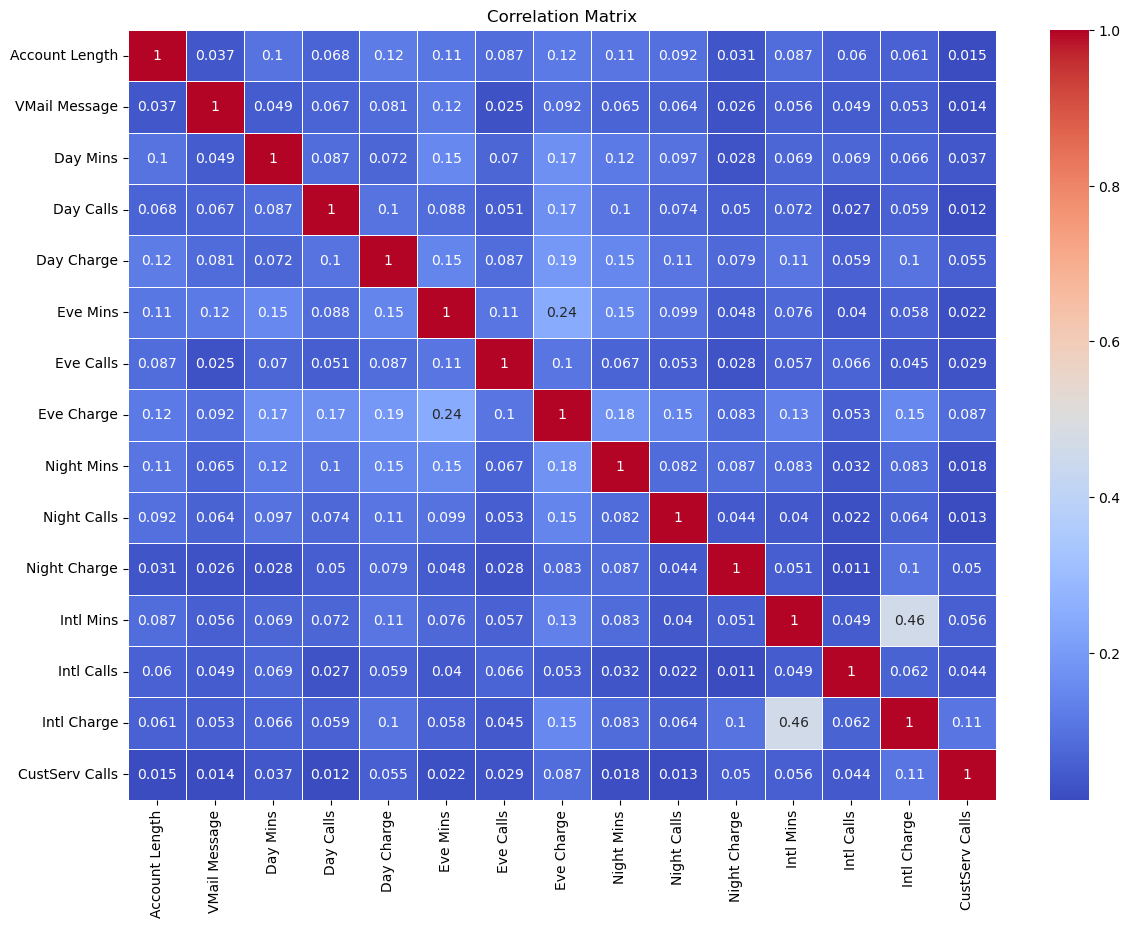

C:\Users\ielsh\AppData\Local\Temp\ipykernel_22172\2293263514.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='Day Mins', data=df, palette='muted')


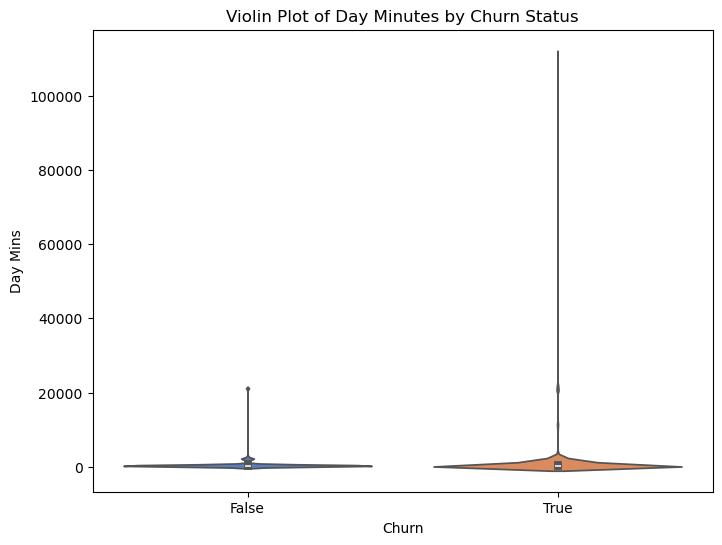

In [10]:
# Pairplot for a selection of numerical features
selected_features = ['Account Length', 'Day Mins', 'Eve Mins', 'Intl Mins', 'Churn']
sns.pairplot(df[selected_features], hue='Churn', palette='coolwarm')
plt.suptitle("Pairplot for Selected Features", y=1.02)
plt.show()

# Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Violin Plot to show distribution of 'Day Mins' and 'Churn'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='Day Mins', data=df, palette='muted')
plt.title("Violin Plot of Day Minutes by Churn Status")
plt.show()


## Train-Test Split

## 📌 Splitting Data for Training & Testing
To evaluate model performance effectively, we split our dataset into training and testing sets.

- **Training Set (80%)**: Used to train the machine learning models.
- **Testing Set (20%)**: Used to evaluate how well the model generalizes to new data.


In [19]:
# Split the dataset
X = df[scaled_features]  # Use the scaled features
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data split completed!")


✅ Data split completed!


Define Models:

In [20]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("✅ Models and cross-validation strategy defined!")


✅ Models and cross-validation strategy defined!


## Model Training & Evaluation

## 🤖 Model Training & Evaluation
We train multiple machine learning models to predict customer churn and evaluate their performance.

### 📌 Models Used:
1. Logistic Regression
2. Random Forest
3. Support Vector Machine (SVM)
4. K-Nearest Neighbors (KNN)
5. Decision Tree

We evaluate these models using **cross-validation** and performance metrics such as:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC Score


In [21]:
# Store results
results = {}

for name, model in models.items():
    print(f"\n🔹 Training and Evaluating {name}...")

    # Cross-validation scores
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    cv_roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    log_loss_value = log_loss(y_test, y_prob) if y_prob is not None else None

    # Store results
    results[name] = {
        "CV Accuracy": np.mean(cv_accuracy),
        "CV Precision": np.mean(cv_precision),
        "CV Recall": np.mean(cv_recall),
        "CV F1 Score": np.mean(cv_f1),
        "CV ROC AUC": np.mean(cv_roc_auc),
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1 Score": f1,
        "Test ROC AUC": roc_auc,
        "Log Loss": log_loss_value
    }

print("✅ Model training and evaluation completed!")



🔹 Training and Evaluating Logistic Regression...


C:\Users\ielsh\.conda\envs\Project\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ielsh\.conda\envs\Project\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-


🔹 Training and Evaluating Random Forest...

🔹 Training and Evaluating SVM...

🔹 Training and Evaluating KNN...

🔹 Training and Evaluating Decision Tree...
✅ Model training and evaluation completed!


## Model Comparison

## 📊 Model Performance Comparison
After training all models, we compare their performance based on different evaluation metrics.

### 🔍 Key Insights:
- Accuracy and precision indicate the correctness of the model.
- Recall and F1-score are critical for handling imbalanced data.
- ROC-AUC helps measure the ability to distinguish between churned and non-churned customers.

The best-performing model can be selected for further optimization and deployment.


In [28]:
# Convert results into a DataFrame
comparison_df = pd.DataFrame(results).T
print("\n📊 Model Performance Comparison:")
display(comparison_df)



📊 Model Performance Comparison:


,CV Accuracy,CV Precision,CV Recall,CV F1 Score,CV ROC AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test ROC AUC,Log Loss
Logistic Regression,0.889507,0.000000,0.000000,0.000000,0.507847,0.889569,0.000000,0.000000,0.000000,0.501732,0.400287
Random Forest,0.931653,0.764085,0.552039,0.640795,0.924469,0.944495,0.802368,0.659925,0.724209,0.943311,0.206080
SVM,0.889921,0.750556,0.006177,0.012241,0.519209,0.889900,0.750000,0.004494,0.008935,0.511503,0.345726
KNN,0.880201,0.416684,0.211155,0.280247,0.796723,0.883944,0.452909,0.244944,0.317939,0.834293,0.807337
Decision Tree,0.913806,0.616931,0.579744,0.597590,0.816984,0.934155,0.719641,0.661423,0.689305,0.861106,1.927681


Confusion Matrix for Each Model


📊 Logistic Regression - Confusion Matrix


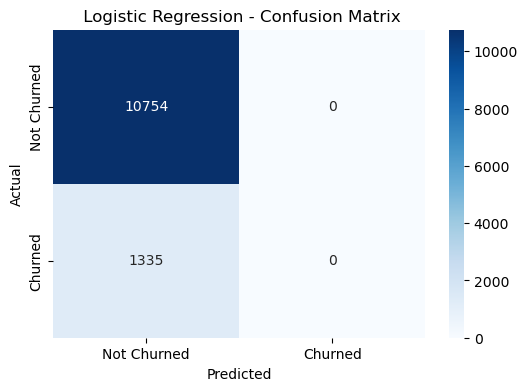


📊 Random Forest - Confusion Matrix


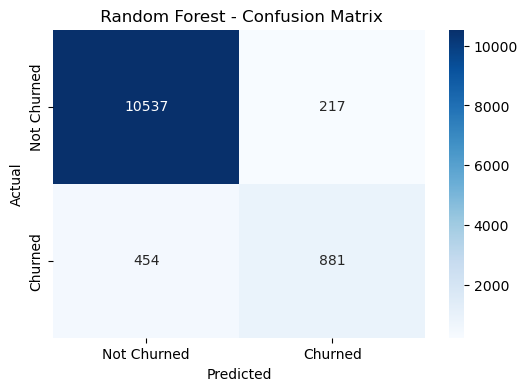


📊 SVM - Confusion Matrix


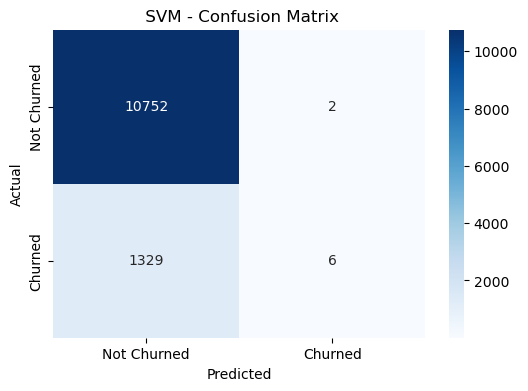


📊 KNN - Confusion Matrix


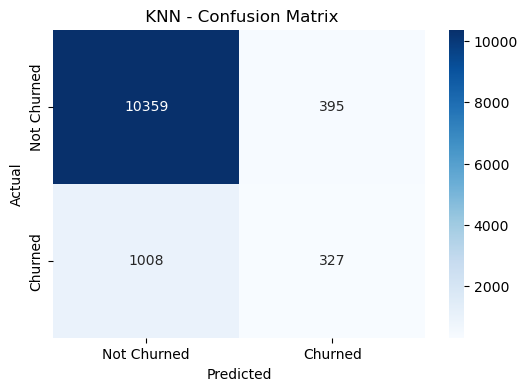


📊 Decision Tree - Confusion Matrix


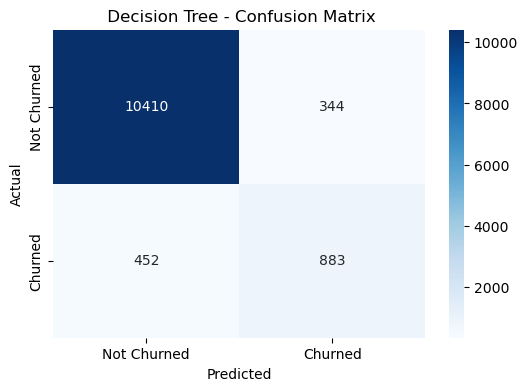

In [31]:
for name, model in models.items():
    print(f"\n📊 {name} - Confusion Matrix")

    # Predictions
    y_pred = model.predict(X_test)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
    plt.title(f" {name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


ROC Curves for Each Model

C:\Users\ielsh\.conda\envs\Project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


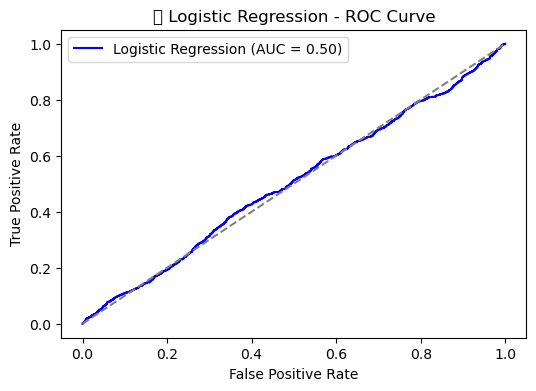

C:\Users\ielsh\.conda\envs\Project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


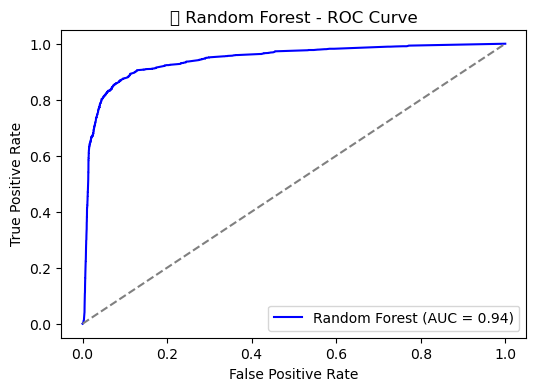

C:\Users\ielsh\.conda\envs\Project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


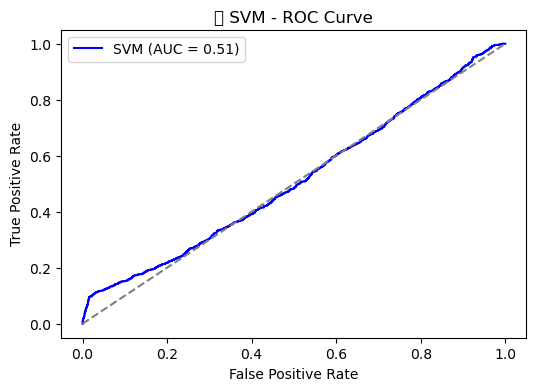

C:\Users\ielsh\.conda\envs\Project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


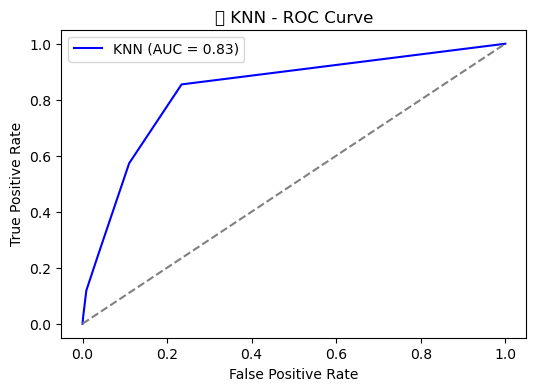

C:\Users\ielsh\.conda\envs\Project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


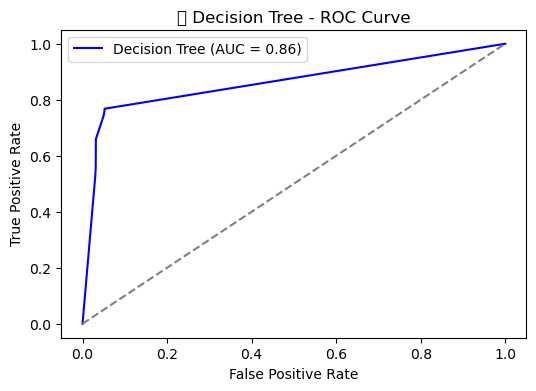

In [32]:
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Ensure model supports probability prediction
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color='blue')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"📈 {name} - ROC Curve")
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.legend()
        plt.show()


Compare Model Performance with Bar Plot

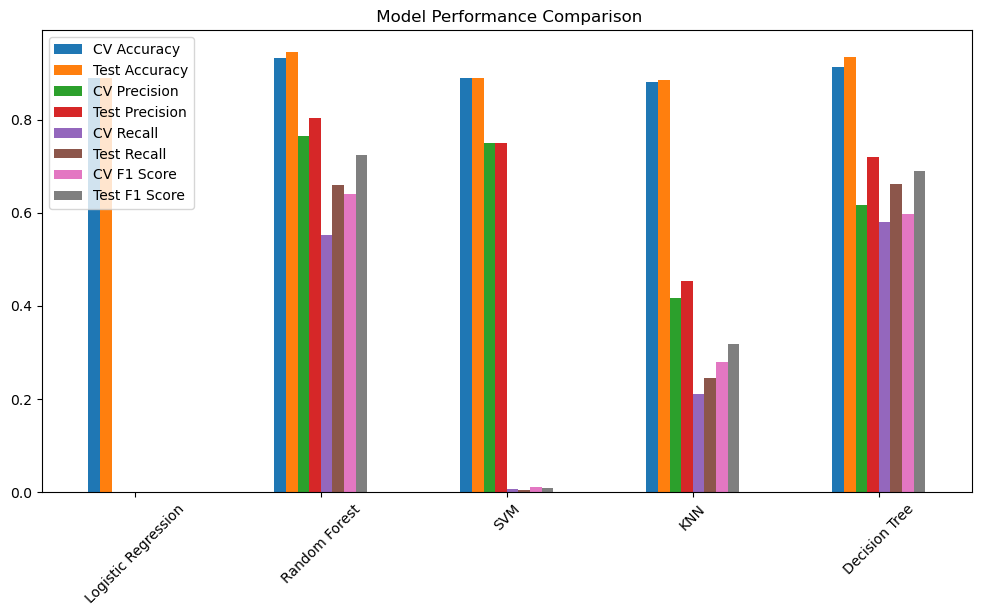

In [34]:
# Bar chart to compare models
comparison_df[['CV Accuracy', 'Test Accuracy', 'CV Precision', 'Test Precision', 
               'CV Recall', 'Test Recall', 'CV F1 Score', 'Test F1 Score']].plot(kind='bar', figsize=(12, 6))
plt.title(" Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


>>>

## Feature Importance Analysis

## 🔍 Feature Importance Analysis
Understanding which features contribute the most to churn prediction can help businesses take targeted actions.

- **Tree-based models (Random Forest, Decision Tree)** provide direct feature importance scores.
- **Logistic Regression & SVM (linear kernel)** indicate feature influence through model coefficients.

This analysis helps identify key customer behaviors that contribute to churn.



 Feature Importance for Logistic Regression


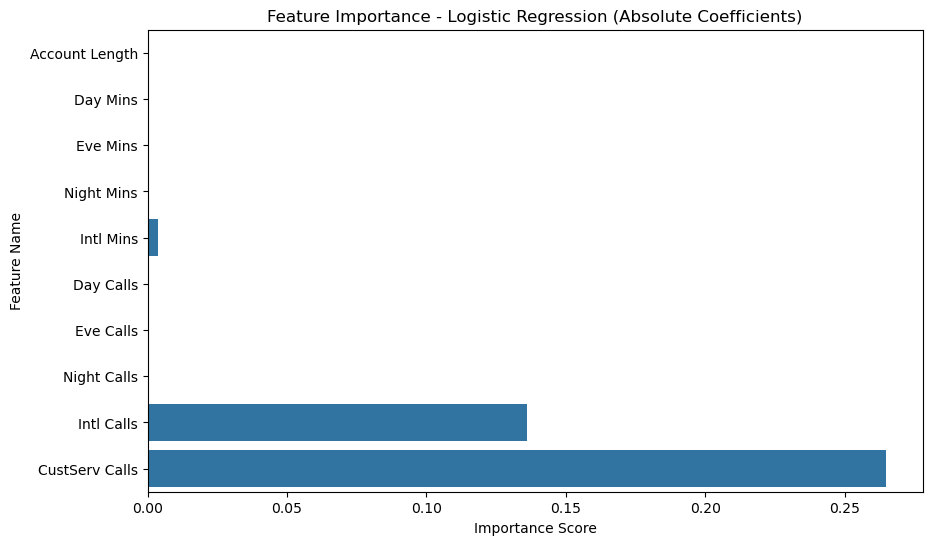


 Feature Importance for Random Forest


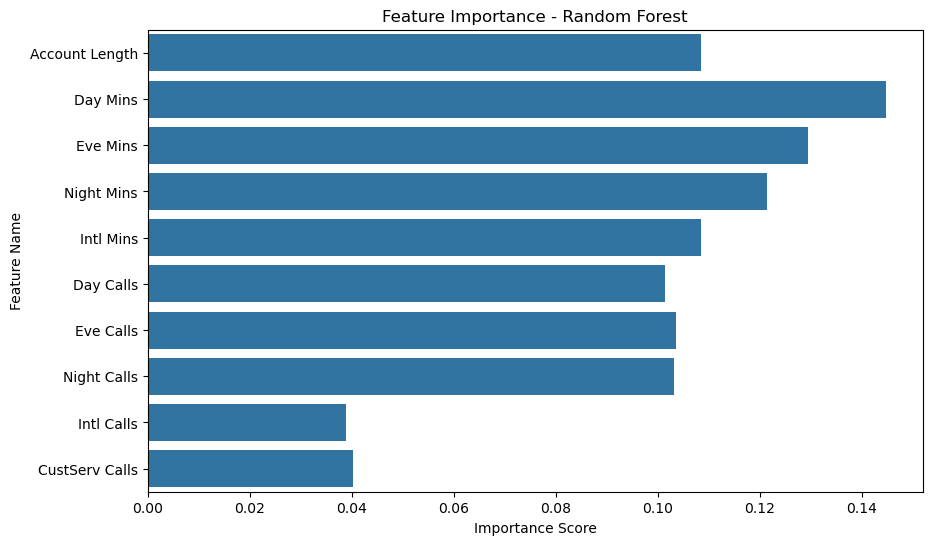


 Feature Importance for SVM
⚠️ SVM does not support feature importance calculation because the kernel is not linear.

 Feature Importance for KNN
⚠️ KNN does not support feature importance calculation.

 Feature Importance for Decision Tree


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

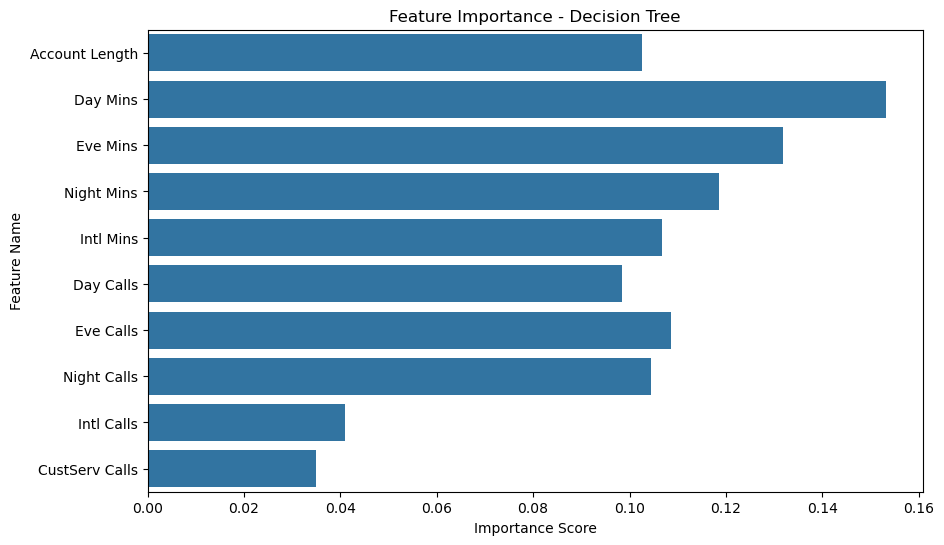

In [35]:
# Feature Importance for Different Models
for name, model in models.items():
    print(f"\n Feature Importance for {name}")

    plt.figure(figsize=(10, 6))

    if isinstance(model, RandomForestClassifier) or isinstance(model, DecisionTreeClassifier):  # Tree-based models
        importances = model.feature_importances_
        sns.barplot(x=importances, y=X.columns)
        plt.title(f'Feature Importance - {name}')

    elif isinstance(model, LogisticRegression):  # Logistic Regression (linear model)
        importances = np.abs(model.coef_).flatten()
        sns.barplot(x=importances, y=X.columns)
        plt.title(f'Feature Importance - {name} (Absolute Coefficients)')

    elif isinstance(model, SVC):  # Support Vector Machines (SVM)
        if model.kernel == "linear":  # Only use coef_ if kernel is linear
            importances = np.abs(model.coef_).flatten()
            sns.barplot(x=importances, y=X.columns)
            plt.title(f'Feature Importance - {name} (Absolute Coefficients)')
        else:
            print(f"⚠️ {name} does not support feature importance calculation because the kernel is not linear.")
            continue  # Skip to next model

    elif isinstance(model, KNeighborsClassifier):  # KNN does not provide feature importance directly
        print(f"⚠️ {name} does not support feature importance calculation.")
        continue  # Skip to next model

    else:
        print(f"⚠️ {name} does not support feature importance calculation.")
        continue  # Skip to next model

    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.show()

# Conclusion 


# 📌 Conclusion

## 🔹 Key Findings:
- Certain features, such as **total minutes spent on calls** and **customer service calls**, significantly impact churn.
- Random Forest and Logistic Regression models provided strong predictive performance.
- Handling class imbalance is important for improving recall.
